In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from IPython.display import Image
import pandas as pd
from datetime import date,datetime,timedelta
import time
import json

import re
import requests
import getpass
from logging import ERROR

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #local_non_use
chrome_options.add_argument('--no-sandbox') #local_non_use
chrome_options.add_argument('--disable-dev-shm-usage') #local_non_use

# Set the locale
#chrome_locale = 'locale-of-choice'
#chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument("--lang={}".format(chrome_locale))
# End - Set the locale

chrome_options.add_argument("accept-language=en-th")

In [15]:
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

driver.maximize_window()

url_main = 'https://www.lazada.co.th/products/edifier-w220t-tws-53-24-qcc3056-ip54-1-i3640204764-s15011736651.html?clickTrackInfo=query%253A%253Bnid%253A3640204764%253Bsrc%253AlazadaInShopSrp%253Brn%253A51785ceae4c1bbd0d5c31bd85e571322%253Bregion%253Ath%253Bsku%253A3640204764_TH%253Bprice%253A1799.00%253Bclient%253Adesktop%253Bsupplier_id%253A100192950246%253Basc_category_id%253A7145%253Bitem_id%253A3640204764%253Bsku_id%253A15011736651%253Bshop_id%253A2327921&freeshipping=1&fs_ab=1&fuse_fs=1&mp=1&source=search&spm=a2o4m.seller.list.i30.1581337da0aiXq'
driver.get(url_main)
time.sleep(10)

# obtain browser height and width
w = driver.execute_script('return document.body.parentNode.scrollWidth')
h = driver.execute_script('return document.body.parentNode.scrollHeight')
# set to new window size
driver.set_window_size(w, h)

''' try:
    language_selection = driver.find_element(
        By.XPATH, ".//*[@class = 'language-selection' ]")
    driver.switch_to.active_element.send_keys(Keys.ESCAPE)

except:
    pass '''

# driver.save_screenshot("screenshot.png")
# Image('screenshot.png')

# elements.screenshot("screenshot.png")
# Image('screenshot.png')


C:\Users\bobby\AppData\Local\Temp\ipykernel_19060\3560011284.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)


' try:\n    language_selection = driver.find_element(\n        By.XPATH, ".//*[@class = \'language-selection\' ]")\n    driver.switch_to.active_element.send_keys(Keys.ESCAPE)\n\nexcept:\n    pass '

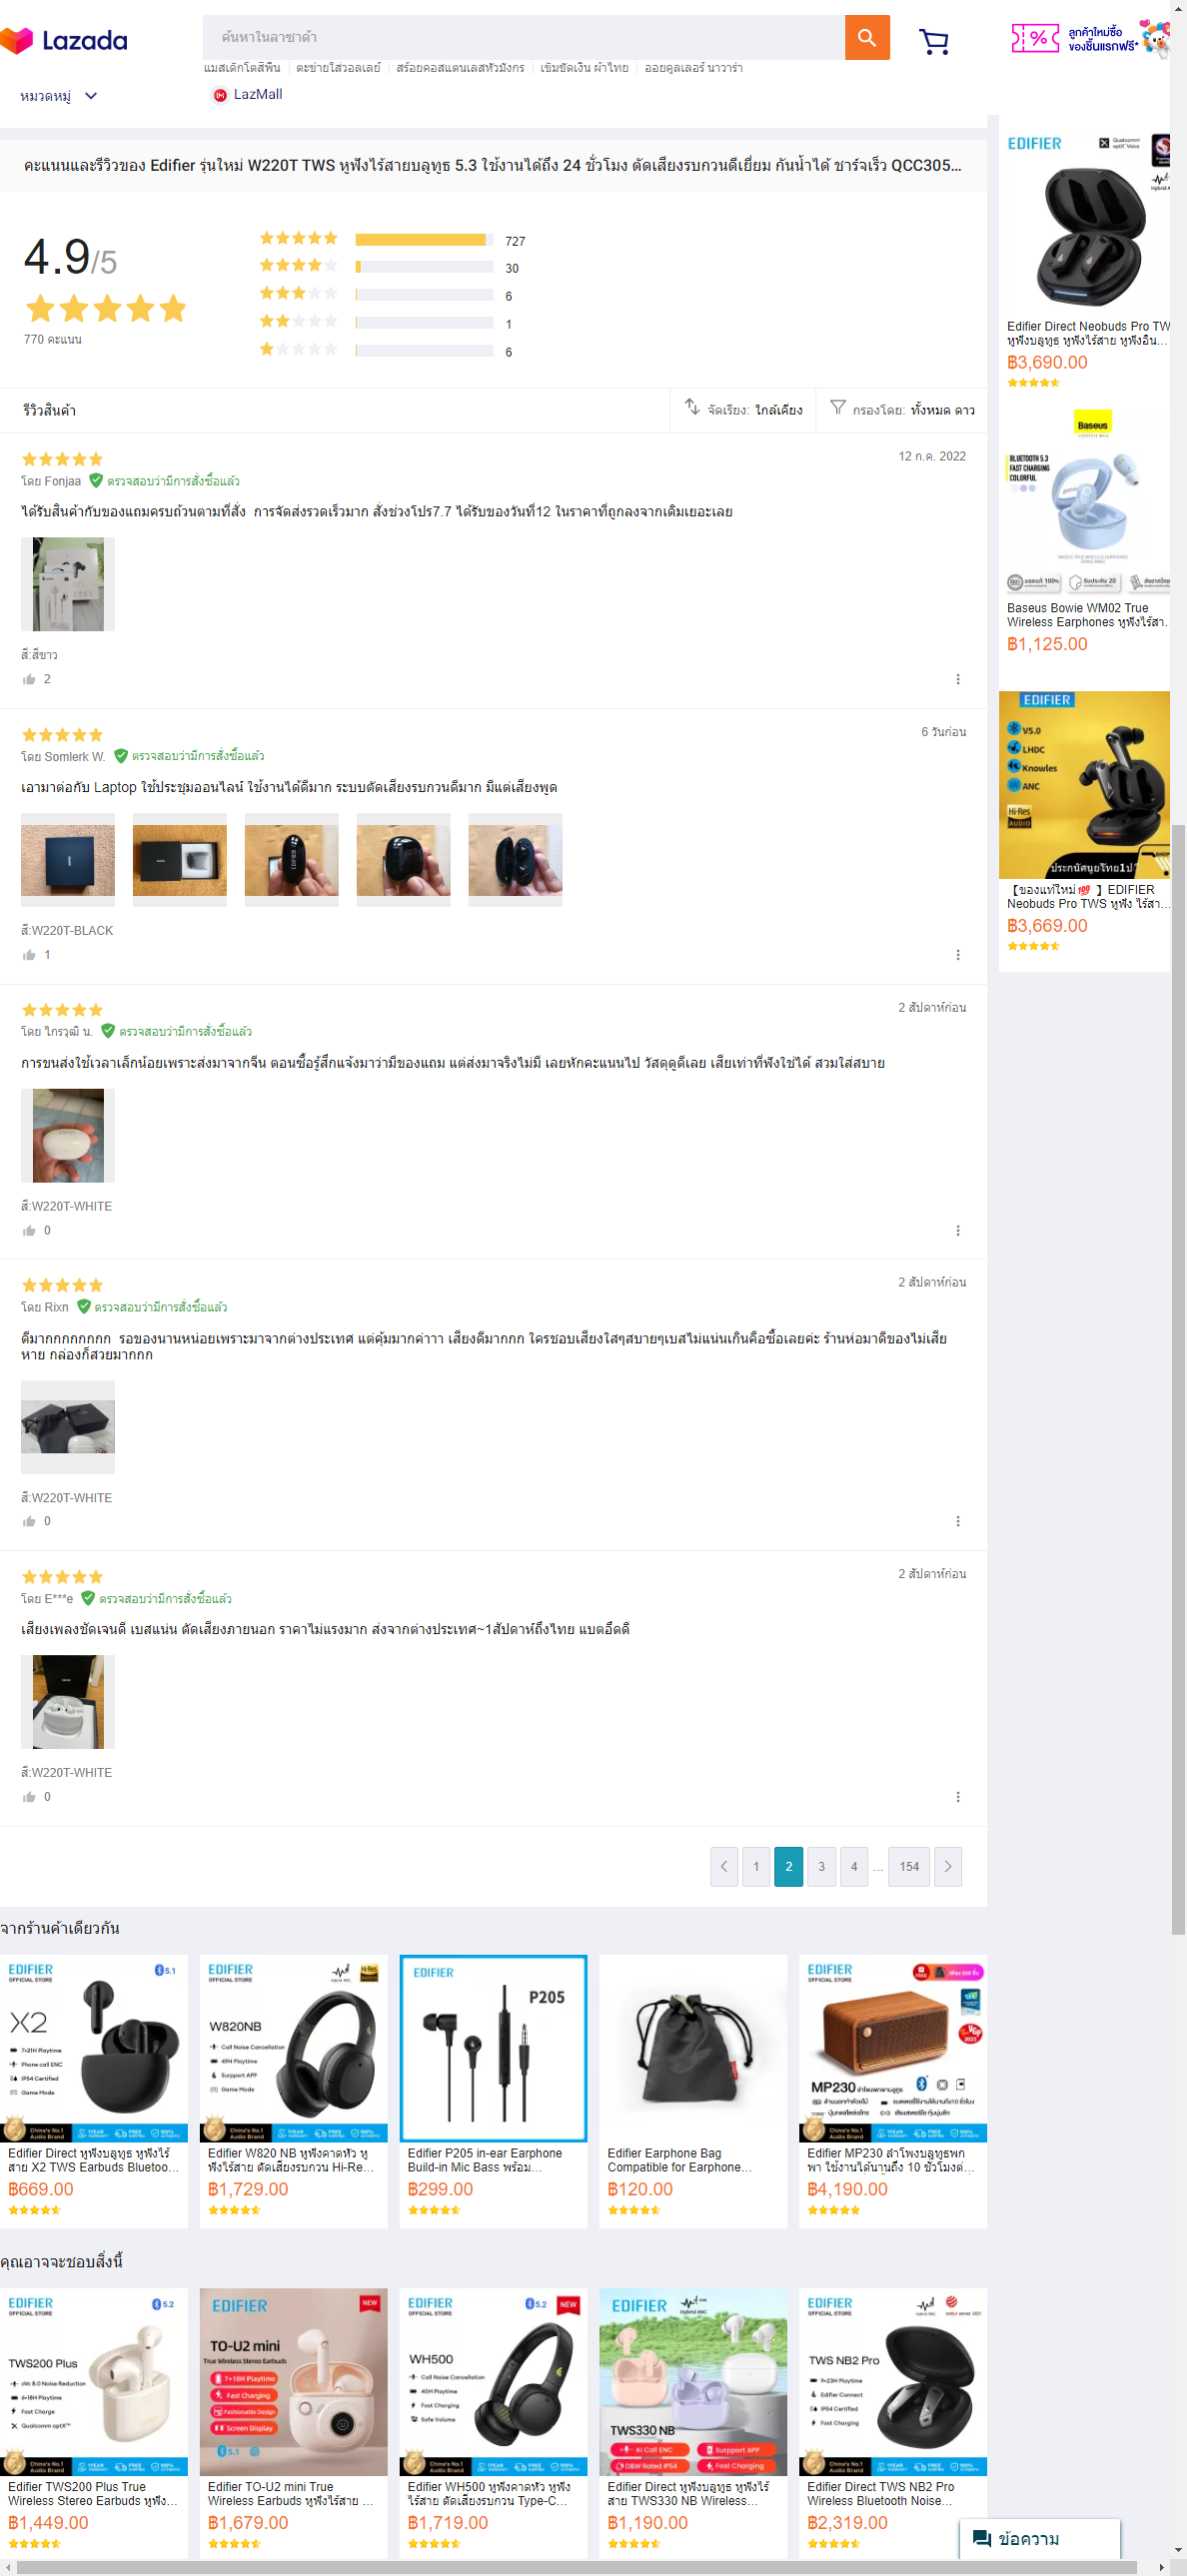

In [23]:
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

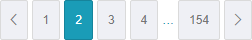

In [24]:
element = driver.find_element(By.XPATH, ".//*[@class = 'next-pagination-pages' ]")
element_button = element.find_elements(By.TAG_NAME, "button")
element.screenshot("screenshot.png")
Image('screenshot.png')

In [25]:
element_button[-1].screenshot("screenshot.png")
Image('screenshot.png')

In [19]:
product_review_list = driver.find_element(By.XPATH, ".//*[@class = 'mod-reviews' ]")
product_review = product_review_list.find_elements(By.XPATH, ".//*[@class = 'item' ]")


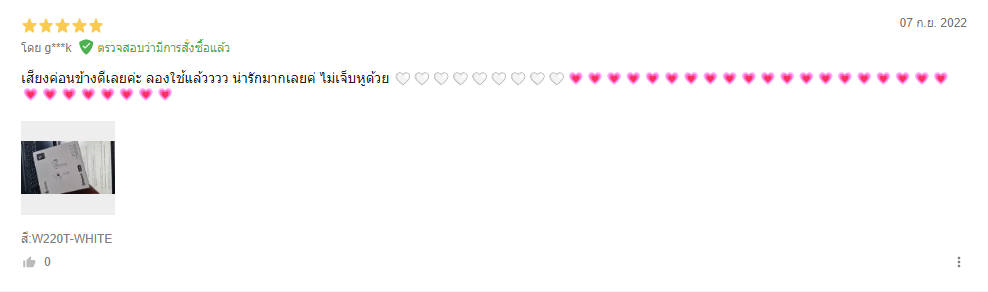

In [20]:
product_review[0].screenshot("screenshot.png")
Image('screenshot.png')

In [22]:
driver.execute_script("arguments[0].click();", element_button[-1])
time.sleep(5)

In [26]:
product_list = []

reading = True
item = 1
item_all = 0
page = 1  # Shopee page = 0

shop_name = 'edifier-direct' #'apple' 'sony-official-store'

try:
    while reading == True:

        url = 'https://www.lazada.co.th/' + shop_name + '/?from=wangpu&pageTypeId=2&q=All-Products&style=wf&page=' + \
            str(page) + '&sort=popularity'
        #url = 'https://shopee.co.th/ctykshp.th?page=' + str(page) + "&sortBy=ctime"

        driver.get(url)
        time.sleep(10)
        # time.sleep(5)

        all_product = driver.find_element(
            By.XPATH, ".//*[@data-qa-locator = 'general-products' ]")
        try:
            product_item = all_product.find_elements(
                By.XPATH, ".//*[@data-qa-locator = 'product-item' ]")
        except:
            product_item = []

        item_all += len(product_item)

        print("Page :", page)
        print("Products of Page :", len(product_item))
        print("Total of Products :", item_all)

        if len(product_item) > 0:
            for i in range(len(product_item)):
                data = {}

                data["Product_ID"] = item

                product_url = product_item[i].find_element(
                    By.TAG_NAME, "a").get_attribute('href')

                #end = product_url.find("?sp_atk=")
                #product_url = product_url[0:end]

                data["Link"] = product_url
                data["Name"] = ""
                data["Status"] = "Sale"
                data["Scan Status"] = "Non-Complete"

                # print(item)
                item += 1
                product_list.append(data)
        else:
            break

        page += 1
except:
    print("Scan is done.")
    pass

Page : 1
Products of Page : 27
Total of Products : 27
Scan is done.


In [27]:
len(product_list)

27

In [28]:
df_product_list = pd.DataFrame(product_list)
df_product_list

,Product_ID,Link,Name,Status,Scan Status
0,1,https://www.lazada.co.th/products/edifier-dire...,,Sale,Non-Complete
1,2,https://www.lazada.co.th/products/edifier-tws2...,,Sale,Non-Complete
2,3,https://www.lazada.co.th/products/edifier-w820...,,Sale,Non-Complete
3,4,https://www.lazada.co.th/products/edifier-w220...,,Sale,Non-Complete
4,5,https://www.lazada.co.th/products/edifier-earp...,,Sale,Non-Complete
5,6,https://www.lazada.co.th/products/edifier-mp10...,,Sale,Non-Complete
6,7,https://www.lazada.co.th/products/edifier-mf20...,,Sale,Non-Complete
7,8,https://www.lazada.co.th/products/edifier-p180...,,Sale,Non-Complete
8,9,https://www.lazada.co.th/products/edifier-dire...,,Sale,Non-Complete
9,10,https://www.lazada.co.th/products/edifier-p205...,,Sale,Non-Complete


In [29]:
from logging import ERROR
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

def scan_comment(product_review):
    
    for j in range(len(product_review)):
        data = {}
        try:
            data["Review_Name"] = product_review[j].find_element(
                By.XPATH, ".//*[@class = 'middle' ]").text
        except:
            print("ERROR : Review_Name")
            pass

        try:
            Rating_Time = product_review[j].find_element(
                By.XPATH, ".//*[@class = 'title right' ]").text
            data["Rating_Time"] = Rating_Time
        except:
            print("ERROR : Rating_Time")
            pass

        try:
            Comment = product_review[j].find_element(
                By.XPATH, ".//*[@class = 'content' ]").text
            data["Comment"] = Comment
        except:
            #print("ERROR : Comment")
            pass

        #data["Review_text"] = product_review[k].text
        review_list.append(data)

def driver_maximize_window():
    driver.maximize_window()

    # obtain browser height and width
    w = driver.execute_script('return document.body.parentNode.scrollWidth')
    h = driver.execute_script('return document.body.parentNode.scrollHeight')
    # set to new window size
    driver.set_window_size(w, h)


C:\Users\bobby\AppData\Local\Temp\ipykernel_19060\4226568.py:2: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)


In [30]:
count_error = 0

while len(df_product_list.loc[df_product_list['Scan Status'] == 'Non-Complete']) != 0:

    print('Non-Complete :',
          len(df_product_list.loc[df_product_list['Scan Status'] == 'Non-Complete']))

    driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

    count = 0

    # for i in range(4):
    for i in range(len(product_list)):

        driver_maximize_window()

        result = None

        if product_list[i]["Scan Status"] != "Complete":
            try:
                while result is None:

                    url = product_list[i]["Link"]
                    driver.get(url)
                    # time.sleep(5)
                    time.sleep(10)

                    product_title = driver.find_element(
                        By.XPATH, ".//*[@class = 'pdp-mod-product-badge-wrapper' ]")
                    product_name = product_title.find_element(
                        By.TAG_NAME, "h1").text
                    result = product_name
                    print(i+1, product_name)
                    product_list[i]["Name"] = product_name

                    if product_list[i]["Name"] != "":
                        try:
                            product_price = driver.find_element(
                                By.XPATH, ".//*[@class = 'pdp-product-price' ]")
                            product_sell_price = product_price.find_element(
                                By.XPATH, ".//*[@class = 'pdp-price pdp-price_type_normal pdp-price_color_orange pdp-price_size_xl' ]").text
                            product_list[i]["Sell Price"] = product_sell_price
                        except:
                            print("ERROR : Non-Detect Sell Price")
                            pass

                        try:
                            product_original_price = product_price.find_element(
                                By.XPATH, ".//*[@class = 'pdp-price pdp-price_type_deleted pdp-price_color_lightgray pdp-price_size_xs' ]").text
                            product_list[i]["Original Price"] = product_original_price
                        except:
                            product_list[i]["Original Price"] = product_list[i]["Sell Price"]
                            print("ERROR : Non-Detect Original Price")
                            pass

                        try:
                            score_average = driver.find_element(
                                By.XPATH, ".//*[@class = 'score-average' ]").text
                            product_list[i]["Score Average"] = score_average
                        except:
                            # product_list[i]["Score Average"] = 'Non-Detect'
                            print("ERROR : Non-Detect Score Average")
                            pass

                        try:
                            text_num_product_sell = driver.find_element(
                                By.XPATH, ".//*[@class = 'quantity-content-default' ]").text
                            num_product_sell = re.sub(
                                r'[^0-9]', '', text_num_product_sell)
                            product_list[i]["Num of Sell"] = int(
                                num_product_sell)
                        except:
                            print("ERROR : Non-Detect Num of Sell")
                            pass

                        try:
                            product_review_list = driver.find_element(
                                By.XPATH, ".//*[@class = 'mod-reviews' ]")

                            try:
                                count_review = 0

                                review_list = []

                                element = driver.find_element(
                                    By.XPATH, ".//*[@class = 'next-pagination-pages' ]")
                                element_button = element.find_elements(
                                    By.TAG_NAME, "button")

                                product_review_list = driver.find_element(
                                    By.XPATH, ".//*[@class = 'mod-reviews' ]")
                                product_review = product_review_list.find_elements(
                                    By.XPATH, ".//*[@class = 'item' ]")
                                count_review += len(product_review)

                                scan_comment(product_review)

                                while element_button[-1].get_attribute('disabled') != 'true':

                                    driver.execute_script(
                                        "arguments[0].click();", element_button[-1])
                                    time.sleep(5)

                                    element = driver.find_element(
                                        By.XPATH, ".//*[@class = 'next-pagination-pages' ]")
                                    element_button = element.find_elements(
                                        By.TAG_NAME, "button")

                                    product_review_list = driver.find_element(
                                        By.XPATH, ".//*[@class = 'mod-reviews' ]")
                                    product_review = product_review_list.find_elements(
                                        By.XPATH, ".//*[@class = 'item' ]")

                                    scan_comment(product_review)

                                    count_review += len(product_review)

                                    # จำกัด 20 Reviews
                                    if count_review >= 20:
                                        break

                                product_list[i]["Num of Reviews"] = len(
                                    review_list)
                                print("Num of Reviews :", len(review_list))
                                product_list[i]["Review"] = review_list

                            except:
                                product_list[i]["Num of Reviews"] = len(
                                    review_list)
                                print("Num of Reviews :", len(review_list))
                                product_list[i]["Review"] = review_list
                                print("ERROR : Review")
                                pass

                        except:
                            print("Non-Detect Review")
                            #product_list[i]["Num of Review"] = 0
                            pass

                    # product_list[i]["Scan Status"] = "Complete"

                    ''' if product_list[i]["Name"] != "":

                        try:
                            product_sell_price = driver.find_element(
                                By.XPATH, ".//*[@class = '_2Shl1j' ]").text
                            product_list[i]["Sell Price"] = product_sell_price
                        except:
                            print("ERROR : Non-Detect Sell Price")
                            pass

                        try:
                            product_original_price = driver.find_element(
                                By.XPATH, ".//*[@class = '_2yjfFH' ]").text
                            product_list[i]["Original Price"] = product_original_price
                        except:
                            product_list[i]["Original Price"] = product_list[i]["Sell Price"]
                            print("ERROR : Non-Detect Original Price")
                            pass

                        try:
                            text_favorite = driver.find_element(
                                By.XPATH, ".//*[@class = 'flex items-center _3CF_vE' ]").text
                            #num_favorite = re.sub(r'[^0-9]', '', text_favorite)
                            #product_list[i]["Favorite"] = int(num_favorite)
                            product_list[i]["Favorite"] = text_favorite
                        except:
                            print("ERROR : Non-Detect Num-Favorite")
                            pass

                        try:
                            text_selled = driver.find_element(
                                By.XPATH, ".//*[@class = 'HmRxgn' ]").text
                            #product_list[i]["Selled"] = int(num_selled)
                            product_list[i]["Selled"] = text_selled
                        except:
                            print("ERROR : Non-Detect Num-Selled")
                            pass

                        try:
                            text_num_product = driver.find_element(
                                By.XPATH, ".//*[@class = 'flex items-center _283ldj' ]")
                            text_num_product_sell = text_num_product.find_element(
                                By.XPATH, ".//*[@class = 'flex items-center' ]").text
                            num_product_sell = re.sub(
                                r'[^0-9]', '', text_num_product_sell)
                            product_list[i]["Num of Sell"] = int(
                                num_product_sell)
                        except:
                            pass

                        try:
                            product_review_list = driver.find_element(
                                By.XPATH, ".//*[@class = 'shopee-product-comment-list' ]")

                            try:
                                count_review = 0
                                review_list = []

                                element = driver.find_element(
                                    By.XPATH, ".//*[@class = 'shopee-page-controller product-ratings__page-controller' ]")
                                test = element.find_element(
                                    By.CSS_SELECTOR, ".shopee-icon-button--right")
                                button = element.find_elements(
                                    By.TAG_NAME, "button")

                                product_review_list = driver.find_element(
                                    By.XPATH, ".//*[@class = 'shopee-product-comment-list' ]")
                                product_review = product_review_list.find_elements(
                                    By.XPATH, ".//*[@class = 'shopee-product-rating__main' ]")
                                count_review += len(product_review)

                                scan_comment(product_review)

                                while button[-2].get_attribute("class") != 'shopee-button-solid shopee-button-solid--primary':

                                    driver.execute_script(
                                        "arguments[0].click();", test)
                                    time.sleep(5)

                                    element = driver.find_element(
                                        By.XPATH, ".//*[@class = 'shopee-page-controller product-ratings__page-controller' ]")
                                    test = element.find_element(
                                        By.CSS_SELECTOR, ".shopee-icon-button--right")
                                    button = element.find_elements(
                                        By.TAG_NAME, "button")

                                    product_review_list = driver.find_element(
                                        By.XPATH, ".//*[@class = 'shopee-product-comment-list' ]")
                                    product_review = product_review_list.find_elements(
                                        By.XPATH, ".//*[@class = 'shopee-product-rating__main' ]")

                                    scan_comment(product_review)

                                    # จำกัด 100 Reviews
                                    count_review += len(product_review)
                                    if count_review >= 100:
                                        break

                                #product_list[i]["Num of Review"] = count_review
                                product_list[i]["Num of Reviews"] = len(
                                    review_list)
                                print("Num of Reviews :", len(review_list))
                                product_list[i]["Review"] = review_list

                                #print("A", len(product_review))
                                #print("B", count_review)

                            except:
                                print("ERROR : Review")
                                pass

                        except:
                            print("Non-Detect Review")
                            #product_list[i]["Num of Review"] = 0
                            pass '''

            except:
                print(i+1, "ERROR")
                product_list[i]["Scan Status"] = "Non-Complete"
                driver.quit()

                driver = webdriver.Chrome(
                    'chromedriver', chrome_options=chrome_options)
                driver_maximize_window()
                pass

    count_error += 1
    df_product_list = pd.DataFrame(product_list)

    if count_error >= 3:
        break


Non-Complete : 27


C:\Users\bobby\AppData\Local\Temp\ipykernel_19060\1647608047.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)


1 Edifier Direct หูฟังบลูทูธ หูฟังไร้สาย Edifier X5 Wireless Earbuds Bluetooth 5.0 ลดเสียงรบกวนจากการโทร IP55 กันฝุ่นและกันน้ำ
ERROR : Non-Detect Score Average
ERROR : Non-Detect Num of Sell
Non-Detect Review
2 Edifier TWS200 Plus True Wireless Stereo Earbuds หูฟังไร้สาย Qualcomm AptX Bluetooth 5.2 up to 24hrs playtime Noise Cancellation
ERROR : Non-Detect Num of Sell
Num of Reviews : 20
3 Edifier W820 NB หูฟังคาดหัว หูฟังไร้สาย ตัดเสียงรบกวน Hi-Res Audio Hybird ANC Type-C Fast Charging Bluetooth V5.0
ERROR : Non-Detect Num of Sell
Num of Reviews : 20
4 Edifier รุ่นใหม่ W220T TWS หูฟังไร้สายบลูทูธ 5.3 ใช้งานได้ถึง 24 ชั่วโมง ตัดเสียงรบกวนดีเยี่ยม กันน้ำได้ ชาร์จเร็ว QCC3056 IP54 รับประกัน 1 ปี
ERROR : Non-Detect Num of Sell
Num of Reviews : 20
5 Edifier Earphone Bag Compatible for Earphone Earbuds with Edifier Logo（New）
ERROR : Non-Detect Original Price
ERROR : Non-Detect Num of Sell
Num of Reviews : 20
6 Edifier MP100 PLUS ลำโพงบลูทูธไร้สายแบบพกพา กันน้ำระดับ IPX7 ลำโพงไร้สายพร้อมด้วย

In [31]:
df_product_list = pd.DataFrame(product_list)
df_product_list

,Product_ID,Link,Name,Status,Scan Status,Sell Price,Original Price,Score Average,Num of Reviews,Review
0,1,https://www.lazada.co.th/products/edifier-dire...,Edifier Direct หูฟังบลูทูธ หูฟังไร้สาย Edifier...,Sale,Non-Complete,฿869.00,"฿1,699.00",NaN,NaN,NaN
1,2,https://www.lazada.co.th/products/edifier-tws2...,Edifier TWS200 Plus True Wireless Stereo Earbu...,Sale,Non-Complete,"฿1,449.00","฿1,999.00",4.8,20.0,[{'Review_Name': 'โดย PomPam😽🐾ตรวจสอบว่ามีการส...
2,3,https://www.lazada.co.th/products/edifier-w820...,Edifier W820 NB หูฟังคาดหัว หูฟังไร้สาย ตัดเสี...,Sale,Non-Complete,"฿1,729.00","฿2,990.00",4.9,20.0,[{'Review_Name': 'โดย Parthตรวจสอบว่ามีการสั่ง...
3,4,https://www.lazada.co.th/products/edifier-w220...,Edifier รุ่นใหม่ W220T TWS หูฟังไร้สายบลูทูธ 5...,Sale,Non-Complete,"฿1,699.00","฿2,699.00",4.9,20.0,[{'Review_Name': 'โดย g***kตรวจสอบว่ามีการสั่ง...
4,5,https://www.lazada.co.th/products/edifier-earp...,Edifier Earphone Bag Compatible for Earphone E...,Sale,Non-Complete,฿120.00,฿120.00,5.0,20.0,[{'Review_Name': 'โดย P***.ตรวจสอบว่ามีการสั่ง...
5,6,https://www.lazada.co.th/products/edifier-mp10...,Edifier MP100 PLUS ลำโพงบลูทูธไร้สายแบบพกพา กั...,Sale,Non-Complete,"฿1,998.00","฿3,299.00",4.9,10.0,[{'Review_Name': 'โดย กิตตรวจสอบว่ามีการสั่งซื...
6,7,https://www.lazada.co.th/products/edifier-mf20...,Edifier MF200 Portable Tabletop Bluetooth Spea...,Sale,Non-Complete,"฿3,099.00","฿3,999.00",0,NaN,NaN
7,8,https://www.lazada.co.th/products/edifier-p180...,Edifier P180 Plus/USBC in-ear Earphone Ear bud...,Sale,Non-Complete,฿379.00,฿599.00,4.9,20.0,[{'Review_Name': 'โดย ช***.ตรวจสอบว่ามีการสั่ง...
8,9,https://www.lazada.co.th/products/edifier-dire...,Edifier Direct หูฟังบลูทูธ หูฟังไร้สาย TWS330 ...,Sale,Non-Complete,"฿1,190.00","฿2,999.00",4.8,20.0,[{'Review_Name': 'โดย Anookul M.ตรวจสอบว่ามีกา...
9,10,https://www.lazada.co.th/products/edifier-p205...,Edifier P205 in-ear Earphone Build-in Mic Bass...,Sale,Non-Complete,฿299.00,฿399.00,4.9,20.0,[{'Review_Name': 'โดย ส***8ตรวจสอบว่ามีการสั่ง...


In [14]:
product_list

[{'Product_ID': 1,
  'Link': 'https://www.lazada.co.th/products/edifier-direct-edifier-x5-wireless-earbuds-bluetooth-50-ip55-i2544667414.html',
  'Name': 'Edifier Direct หูฟังบลูทูธ หูฟังไร้สาย Edifier X5 Wireless Earbuds Bluetooth 5.0 ลดเสียงรบกวนจากการโทร IP55 กันฝุ่นและกันน้ำ',
  'Status': 'Sale',
  'Scan Status': 'Non-Complete',
  'Sell Price': '฿869.00',
  'Original Price': '฿1,699.00'},
 {'Product_ID': 2,
  'Link': 'https://www.lazada.co.th/products/edifier-tws200-plus-true-wireless-stereo-earbuds-qualcomm-aptx-bluetooth-52-up-to-24hrs-playtimenoise-cancellation-i3284890319.html',
  'Name': 'Edifier TWS200 Plus True Wireless Stereo Earbuds หูฟังไร้สาย Qualcomm AptX Bluetooth 5.2 up to 24hrs playtime Noise Cancellation',
  'Status': 'Sale',
  'Scan Status': 'Non-Complete',
  'Sell Price': '฿1,449.00',
  'Original Price': '฿1,999.00',
  'Score Average': '4.8',
  'Num of Reviews': 5,
  'Review': [{'Review_Name': 'โดย PomPam😽🐾ตรวจสอบว่ามีการสั่งซื้อแล้ว',
    'Rating_Time': '14 พ.ค. 

In [32]:
json_string = json.dumps(product_list, ensure_ascii=False)
print(json_string)

[{"Product_ID": 1, "Link": "https://www.lazada.co.th/products/edifier-direct-edifier-x5-wireless-earbuds-bluetooth-50-ip55-i2544667414.html", "Name": "Edifier Direct หูฟังบลูทูธ หูฟังไร้สาย Edifier X5 Wireless Earbuds Bluetooth 5.0 ลดเสียงรบกวนจากการโทร IP55 กันฝุ่นและกันน้ำ", "Status": "Sale", "Scan Status": "Non-Complete", "Sell Price": "฿869.00", "Original Price": "฿1,699.00"}, {"Product_ID": 2, "Link": "https://www.lazada.co.th/products/edifier-tws200-plus-true-wireless-stereo-earbuds-qualcomm-aptx-bluetooth-52-up-to-24hrs-playtimenoise-cancellation-i3284890319.html", "Name": "Edifier TWS200 Plus True Wireless Stereo Earbuds หูฟังไร้สาย Qualcomm AptX Bluetooth 5.2 up to 24hrs playtime Noise Cancellation", "Status": "Sale", "Scan Status": "Non-Complete", "Sell Price": "฿1,449.00", "Original Price": "฿1,999.00", "Score Average": "4.8", "Num of Reviews": 20, "Review": [{"Review_Name": "โดย PomPam😽🐾ตรวจสอบว่ามีการสั่งซื้อแล้ว", "Rating_Time": "14 พ.ค. 2022", "Comment": "ได้รับสินค้าเรี

In [33]:
with open('lazada_sample_test.json', 'w' , encoding="utf-8") as f:
    f.write(json_string)
